# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [24]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Defining functions

In [25]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [26]:
num_x = 10000
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

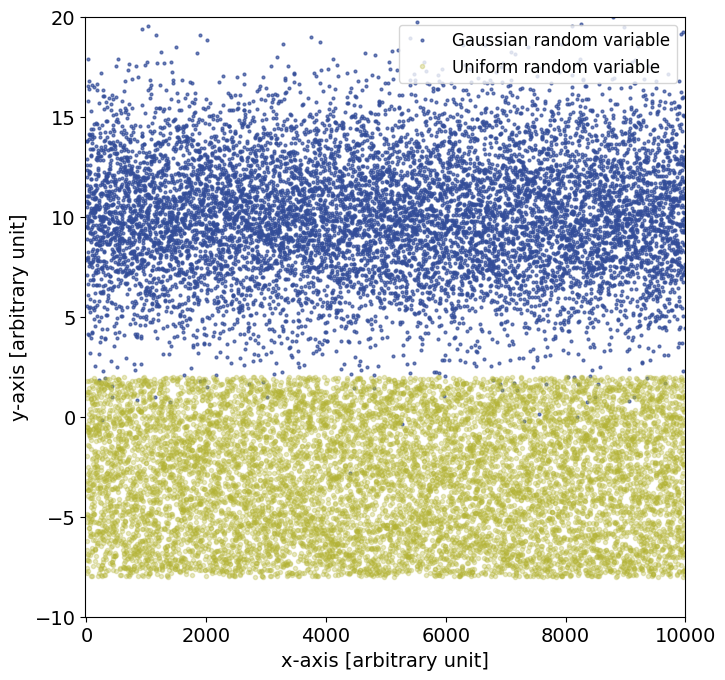

In [27]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

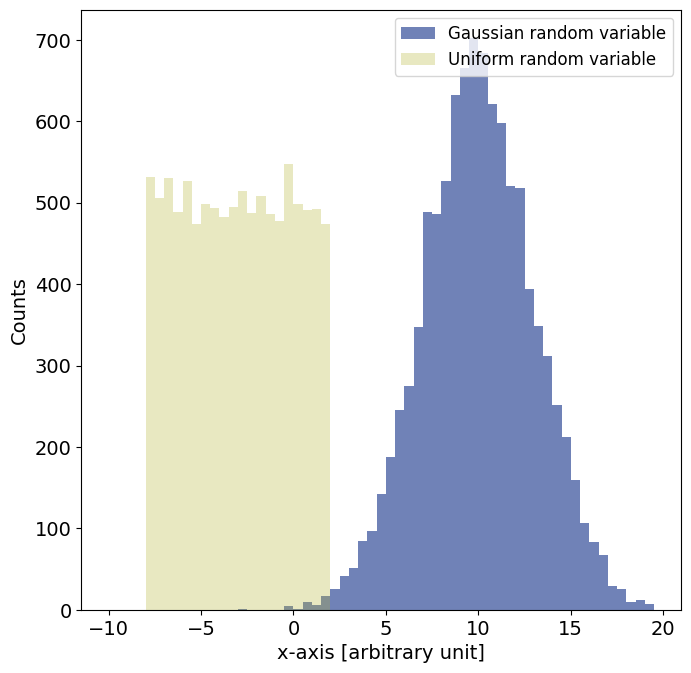

In [28]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [29]:
num_x = 100
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

a       = 10.0
b       = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a, b) + y_err
print(y)

[ 412.27343421  222.63430352  160.93063467  302.07470726  740.61218048
  247.10271314  393.76454869  646.6351036   185.69940605  831.93324144
 1008.87458333  143.71533362  336.6934362   625.95099937  558.03062288
  724.40193056 1013.72755821  836.50938336  521.93862592  776.85832122
  342.9254809   380.2102566   397.41557369  209.80416738  468.9777558
  411.21449109  644.78557834  740.32280781  935.31788238  827.29173187
  191.88682445  989.49516446  310.51210783  805.81619601 1033.98409099
 1091.70251637  177.12440591  853.50909    1043.43852731  371.63090454
  152.40188683  519.36065083  268.90392863  705.31362082  381.59401414
  305.58169859  650.16947247  140.30917581  648.84747096  930.30455739
  306.41271118  119.40331332  120.65708494  177.40233672 1020.92541408
  161.90044602  470.14281267  936.69684753  561.21064646  758.95647108
  217.64662548  216.86797564  316.5205303   470.66515726  521.31951188
 1093.00360427  466.55454117  238.98963824  201.43553234  656.84852127
  548.8

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [30]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [31]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[35.7471729  14.59924692  2.28034094 19.23232346 65.85055769 15.12356398
 33.520274   51.40418422  7.85852387 70.93904015 92.00055389  7.0730221
 23.97781038 52.81608069 44.3064252  66.83035732 89.28026387 71.18631353
 43.54733642 62.62945909 21.35396854 33.490079   29.81047567 13.74561502
 38.28163685 33.14869243 51.27163748 59.52271381 83.57487114 74.35860503
  7.87621348 91.34344336 20.03619314 69.491185   91.98055154 98.80207595
  6.40357683 77.64558394 92.94802225 26.43235309  5.36659948 37.66977088
 17.53290685 61.84897626 26.46412509 19.73308954 50.00770521  3.40638262
 51.597039   82.04498904 20.92281102  3.4221485   3.5681837  13.04537886
 89.1724606   0.99267168 37.38739132 83.92362826 48.27557267 64.72893451
  7.90405289 12.82100666 22.11856342 37.5298205  43.95562931 99.4900057
 39.12366778 15.03090691  6.46465338 54.15486733 46.64195849 72.12745742
 63.40789848 12.52241295 37.13953877 31.99840933 52.30410572 13.05527399
 50.91748396  5.73467411 19.901

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [32]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

            x           y  y_err
0   35.747173  412.273434   30.0
1   14.599247  222.634304   30.0
2    2.280341  160.930635   30.0
3   19.232323  302.074707   30.0
4   65.850558  740.612180   30.0
..        ...         ...    ...
95  56.740028  701.892364   30.0
96  12.810866  246.088111   30.0
97  27.165588  373.801504   30.0
98  47.834819  634.608030   30.0
99  16.877387  262.921230   30.0

[100 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [33]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

            x           y  y_err
0   35.747173  412.273434   30.0
1   14.599247  222.634304   30.0
2    2.280341  160.930635   30.0
3   19.232323  302.074707   30.0
4   65.850558  740.612180   30.0
..        ...         ...    ...
95  56.740028  701.892364   30.0
96  12.810866  246.088111   30.0
97  27.165588  373.801504   30.0
98  47.834819  634.608030   30.0
99  16.877387  262.921230   30.0

[100 rows x 3 columns]


In [34]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0     35.747173
1     14.599247
2      2.280341
3     19.232323
4     65.850558
        ...    
95    56.740028
96    12.810866
97    27.165588
98    47.834819
99    16.877387
Name: x, Length: 100, dtype: float64
 
0     412.273434
1     222.634304
2     160.930635
3     302.074707
4     740.612180
         ...    
95    701.892364
96    246.088111
97    373.801504
98    634.608030
99    262.921230
Name: y, Length: 100, dtype: float64


#### 2.3.3 Plotting the loaded data

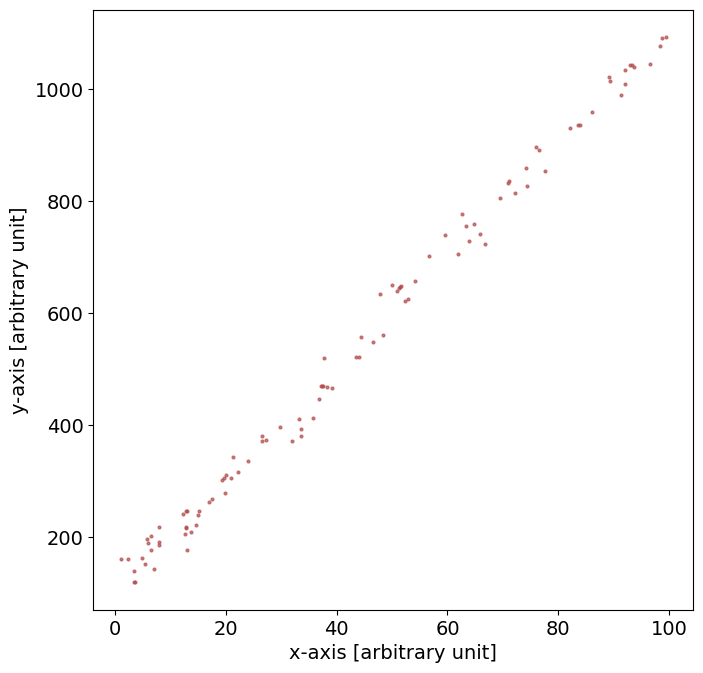

In [35]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### Defining functions

In [36]:
def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )

### 3.1 Home made code to fit the 1D polynomial model

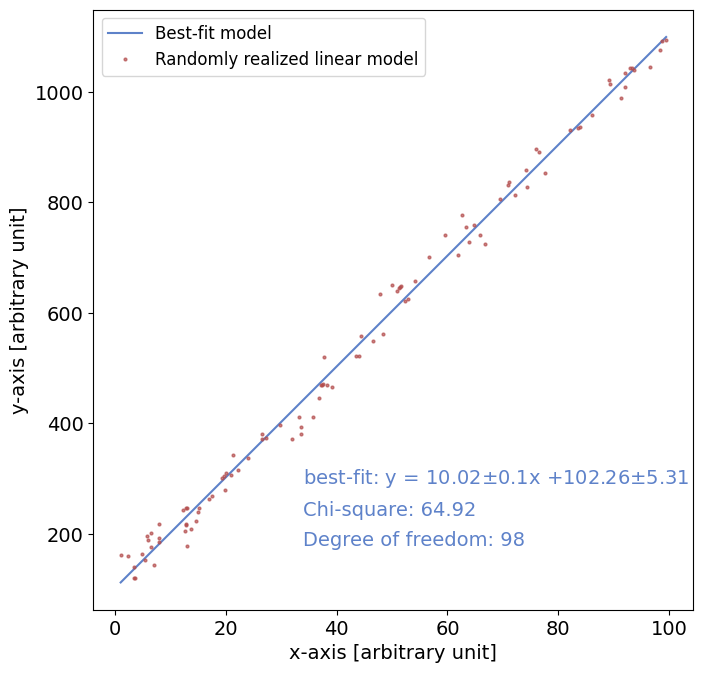

In [37]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# Equations in Section 15.2 (Fitting Data to a straight line) of W. H. Press, Numerical Receipes, 3rd ed.
# Note that the definition of a and b is interchanged.
S = np.sum(
           1.0 / (df_read.y_err**2)
          )
Sx = np.sum(
            df_read.x / (df_read.y_err**2)
           )
Sy = np.sum(
            df_read.y / (df_read.y_err**2)
           )
Sxx = np.sum(
             (df_read.x**2) / (df_read.y_err**2)
            )
Sxy = np.sum(
             (df_read.x*df_read.y) / (df_read.y_err**2)
            )
Delta = S * Sxx - Sx**2

popt = np.zeros(2)
perr = np.zeros(2)

popt[1]     = (Sxx*Sy - Sx*Sxy) / Delta
popt[0]     = (S*Sxy - Sx*Sy)   / Delta

perr[1]     = np.sqrt( Sxx / Delta )
perr[0]     = np.sqrt( S / Delta )

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', markersize = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.35, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.35, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('HM_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.2 Scipy fitting of the 1D polynomial model

Best-fit a:  10.021021790334235   Best-fit b:  102.26009733221967
a error:  0.08199302479240222   b error : 4.322602952084302


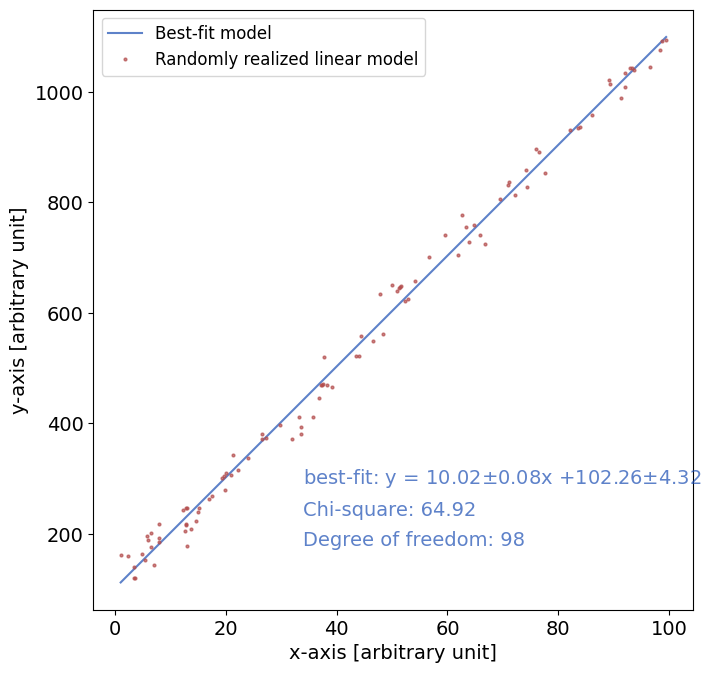

In [38]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                      )

# evaluating the uncertainties of fit parameters from the covariant matrix
perr = np.sqrt(np.diag(pcov))

print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
print('a error: ', perr[0], '  b error :', perr[1])

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', markersize = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.35, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.35, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.3 MCMC fitting of the 1D polynomial model
y = ax + b

In [39]:
# importing the package for MCMC fittings
import emcee, corner

In [40]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

You have 8 Processors


#### 3.3.1 Definining functions that are required in the MCMC model fittings

In [41]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if (-1e10 < a < 1e10) and \
       (-1e10 < b < 1e10):
        return 0.0
    
    return -np.inf


def log_likelihood(parms, x, y, y_err):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    ymodel = myline(x, a, b)
    
    ln_likelihood = -0.5 * chisquare(y, y_err, ymodel)
    
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.3.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [42]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 16    # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 1000 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

100%|█████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.95it/s]


State([[ 10.03919202  97.93364101]
 [ 10.05314462 100.94896603]
 [ 10.17784507  95.77055796]
 [ 10.2149172   97.56807992]
 [ 10.18855032  96.19343502]
 [  9.88608552 105.7141022 ]
 [ 10.22676912  98.2883636 ]
 [  9.80880535 115.83636199]
 [ 10.08828764 102.72275873]
 [  9.97583837 105.83588281]
 [ 10.07767168 102.34161171]
 [ 10.15700624  96.72187248]
 [ 10.14643343  96.01850344]
 [ 10.12040495 101.37966918]
 [ 10.14022581  96.68674616]
 [ 10.17738393  94.99293445]], log_prob=[-33.17311657 -32.51347105 -33.68012747 -35.09286399 -33.92791255
 -33.68362192 -35.92505079 -35.72977509 -33.32317381 -32.70685038
 -32.9804261  -33.38124883 -33.27148299 -33.60741593 -33.17070002
 -33.67888493], blobs=None, random_state=('MT19937', array([3183051705, 3120972193, 2212019864, 2337930917,  763764518,
       2192429628, 1297057977,   48483796, 3703632373,  246042781,
        755785939, 2924041555, 2688635001,   69614490, 2451185985,
        730662081, 1831215505, 1534595574,  754722151,  146479301,


#### 3.3.3 Plotting saplers

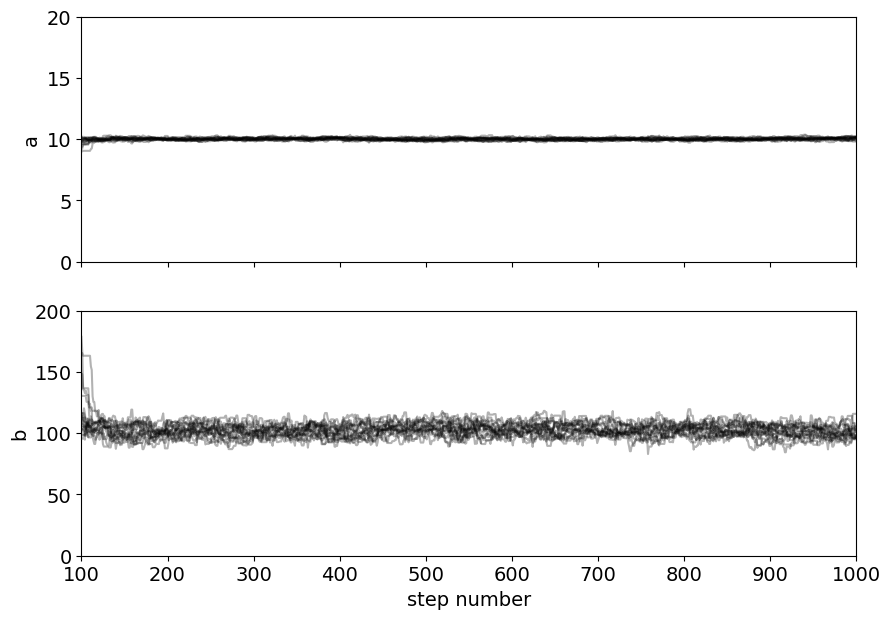

In [43]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.4 Making corner plot

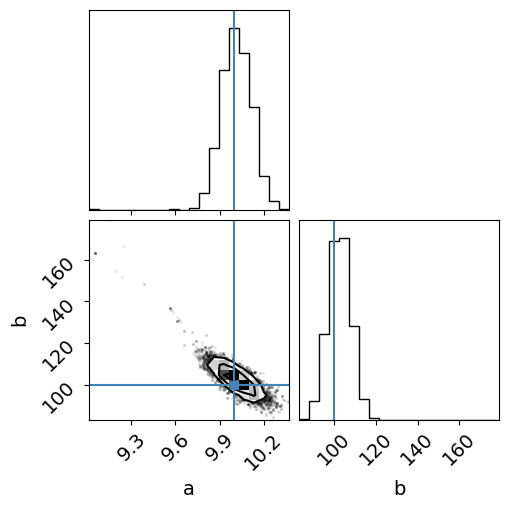

In [44]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )

fig = corner.corner(
                    flat_samples, labels = labels, truths=[a, b]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.5 Summarizing the results of MCMC fittings

In [45]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

a value is: 10.01-0.1/+0.1
b value is: 102.4-5.38/+5.46


#### 3.3.6 Plotting the MCMC fitting results

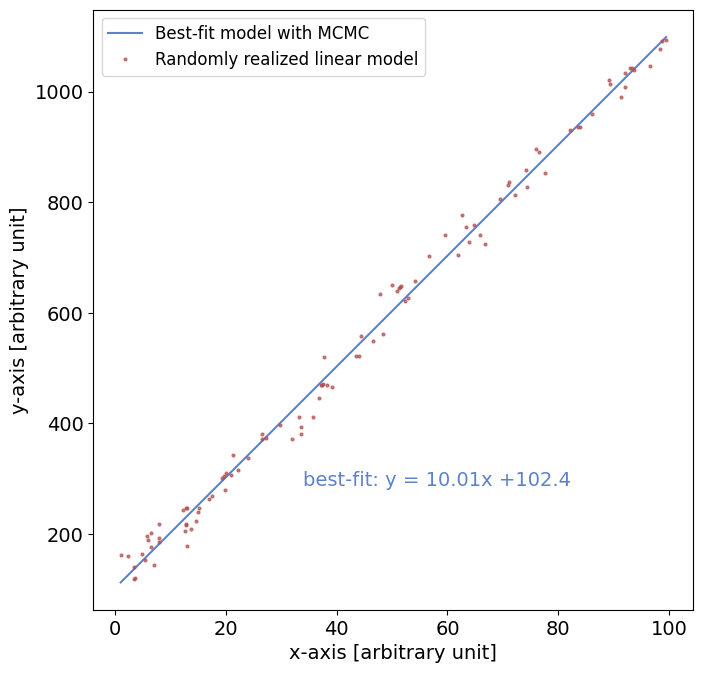

In [46]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot model
x_sort = np.sort(df_read.x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', markersize = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )